In [121]:
from protclus import MCODE,DPCLUS,IPCA,COACH
import timeit


In [122]:
algos=[MCODE,DPCLUS,IPCA,COACH]

In [123]:
datasets=['data/unweighted_example_network.txt']
time={}

In [124]:
for data in datasets:
    filename=data
    for algo in algos:
        c=algo(filename)
        c.cluster()
        time[algo.__name__]=timeit.timeit(c.cluster, number=1)
        c.save_clusters("out/"+algo.__name__+".txt")

## Input graph loaded; 4416 nodes
## Weighting vertices...
## Molecular complex prediction...
YDL082W YDR471W YDR064W YGL030W YJL177W YDR012W YGR085C YDL136W YNL301C YJR123W YGL147C YNL069C YLR441C YBR181C YML063W YML073C YBL072C YDL083C YMR242C YLR287C-A YOR063W YER074W YHL001W YDR447C YDR382W YPL220W YBR031W YHR141C YOL127W YMR194W YBL027W YIL133C YOR096W YBR048W YDR418W YGL135W YLR448W YDL075W YCR031C YIL018W YKL180W YGL103W YNL096C YPL090C YNL178W YHR203C YMR142C YPL198W YOR312C YHL033C YGL076C YFR031C-A YLR029C YLL045C YBL092W YLR075W YJL190C YGR034W YPL249C-A
1 59 YIL133C
YJR043C YML032C YDR076W YER095W YOR272W YLR320W YFL002C YML028W YGL003C YDR439W YDL031W YNR052C YOR080W YPL211W YMR190C YNL298W YCR066W YDR217C YPR164W YDR004W YPL055C YLR085C YIL069C YKL113C YLL008W YGL020C YBR189W YLR340W YOR206W YMR038C YLR032W YER102W YHR154W YNL061W YER083C YHR013C YDR025W YNL250W YNL002C YGL163C YOL077C YOL040C YOL012C YGR252W YJL115W YNL273W YDR359C YDL040C YDL074C YOL004W YJL092W YGL058W

100%|██████████| 4416/4416 [08:12<00:00,  8.97it/s]


Found 1835 clusters/protein complexes


100%|██████████| 4416/4416 [08:04<00:00,  9.12it/s]


Found 1835 clusters/protein complexes


In [125]:
time
# Write into a text file algo name and time taken
def write_algo_time(algo_name, time_taken):
    with open("algo_time.txt", "a") as f:
        f.write(algo_name + " " + str(time_taken) + "\n")
for a in algos:
    write_algo_time(a.__name__,time[a.__name__])
time

{'MCODE': 22.69276676699883,
 'DPCLUS': 271.90058159399996,
 'IPCA': 717.3349100790001,
 'COACH': 518.9000690640005}

In [126]:
#Get both algo name and time from the algo_time.txt  display in bargraph with x axis is graph name and y axis is time taken to execute the algorithm

def get_algo_time_avg():
    sumTimes={}
    totalNo={}
    with open('algo_time.txt', 'r') as f:
        lines = f.readlines()
    for line in lines:
        split=line.split(" ")
        algoName=split[0]
        algoTime=split[1][:-4]
        if sumTimes.get(algoName)==None:
            sumTimes[algoName]=0
        sumTimes[algoName]+=float(algoTime)
        if totalNo.get(algoName)==None:
            totalNo[algoName]=0
        totalNo[algoName]+=1
    avg={}
    for key in sumTimes:
        avg[key]=sumTimes[key]/totalNo[key]
        avg[key]=avg[key]/60
    return avg
avg=get_algo_time_avg()


In [127]:
import matplotlib.pyplot as plt
import numpy as np

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],str(y[i]*60)[:-5]+'s',fontsize=10,ha="center")

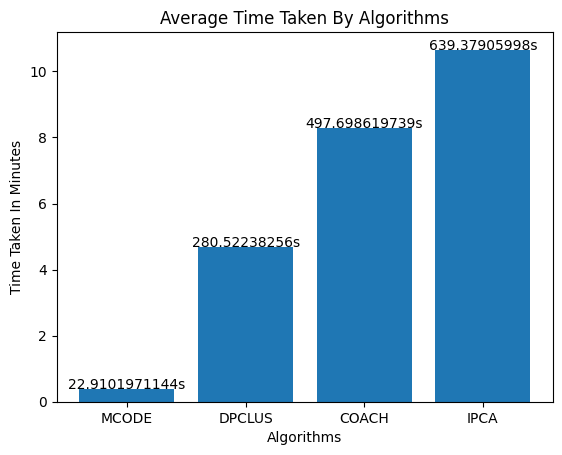

<Figure size 1000x500 with 0 Axes>

In [128]:
#Show avg time taken by all algorithms
data=avg
plt.bar(data.keys(),data.values())
plt.title("Average Time Taken By Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Time Taken In Minutes")
addlabels(list(data.keys()),list(data.values()))
plt.figure(figsize = (10, 5))
plt.show()


In [182]:
# no of cluster for each algorithm
no_of_clusters={}
for a in algos:
    output='out/'+a.__name__+'.txt'
    with open(output,'r') as f:
        lines=f.readlines()
        no_of_clusters[a.__name__]=len(lines)
no_of_clusters


{'MCODE': 59, 'DPCLUS': 901, 'IPCA': 2806, 'COACH': 1835}

In [132]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],y[i],str(y[i]),fontsize=10,ha="center")

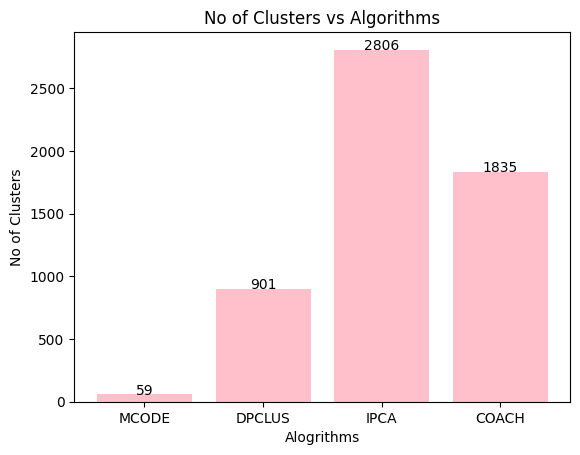

In [187]:
plt.bar(no_of_clusters.keys(), no_of_clusters.values(), color='pink')
addlabels(list(no_of_clusters.keys()), list(no_of_clusters.values()))
plt.ylabel('No of Clusters')
plt.xlabel("Alogrithms")
plt.title("No of Clusters vs Algorithms")
plt.show()

In [200]:
noOfNodes=4416
nodesPerCluster={}
for algo in algos:
    nodesPerCluster[algo.__name__]=noOfNodes/no_of_clusters[algo.__name__]
print(nodesPerCluster)

{'MCODE': 74.84745762711864, 'DPCLUS': 4.901220865704772, 'IPCA': 1.5737704918032787, 'COACH': 2.4065395095367847}


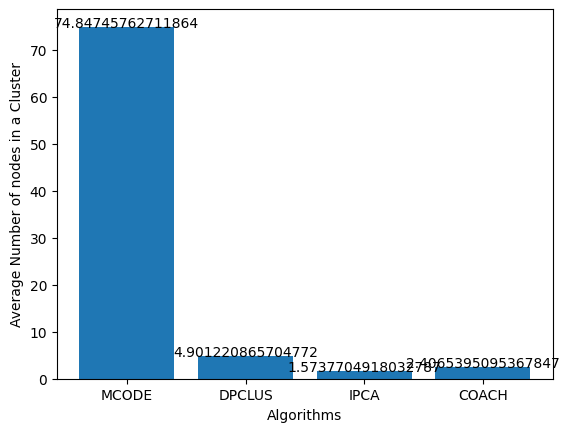

In [203]:
plt.bar(nodesPerCluster.keys(),nodesPerCluster.values())
plt.xlabel("Algorithms")
plt.ylabel("Average Number of nodes in a Cluster")
addlabels(list(nodesPerCluster.keys()),list(nodesPerCluster.values()))
plt.show()

In [ ]:
# Time per no of Nodes

In [ ]:
#Time per no of edges


In [ ]:
# Other Parameters